In [2]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd
import seaborn as sns
import glob
import numpy as np
# Some preprocessing utilities
from sklearn.cross_validation import train_test_split # Data splitting
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import cross_val_score
# Model result function
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn.utils import shuffle
import itertools
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
sns.set_context('paper')
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)
%matplotlib inline
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

/data/olorato/mywork/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']

<IPython.core.display.Javascript object>


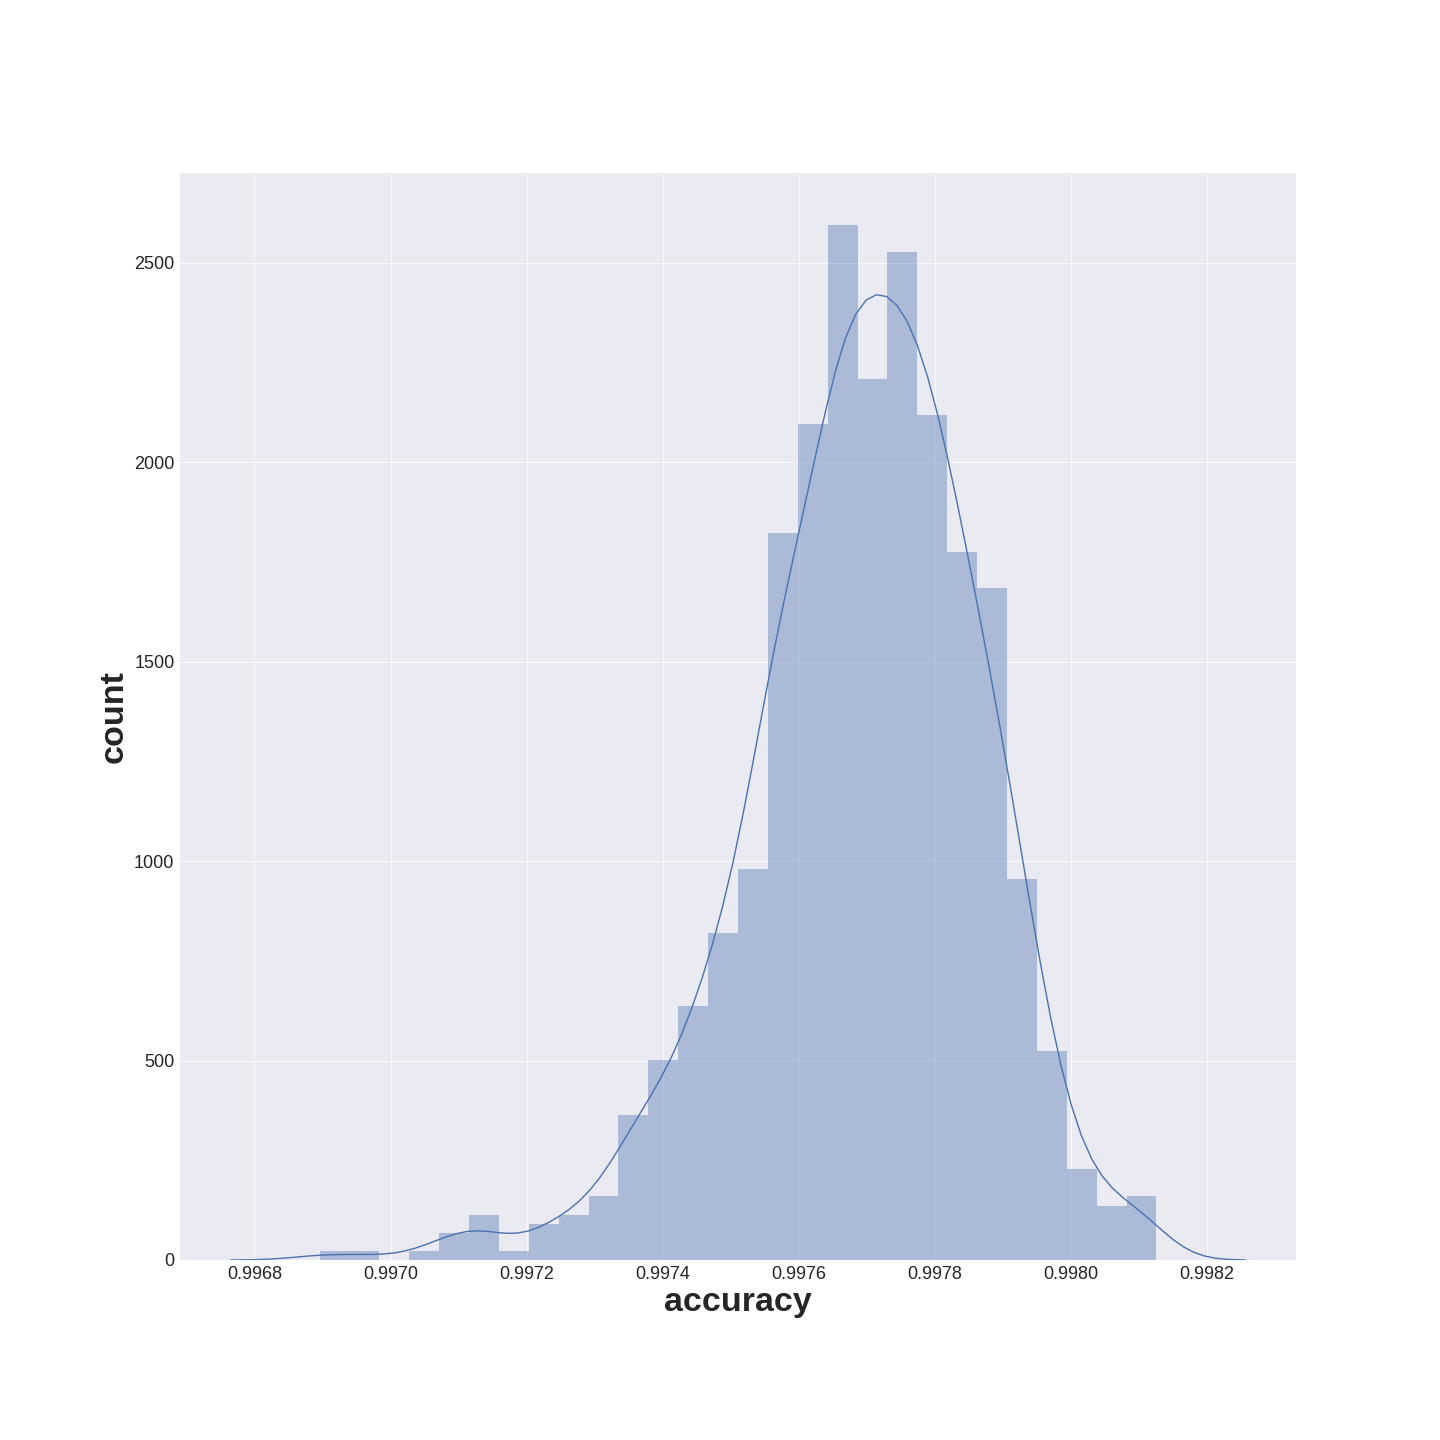

<IPython.core.display.Javascript object>


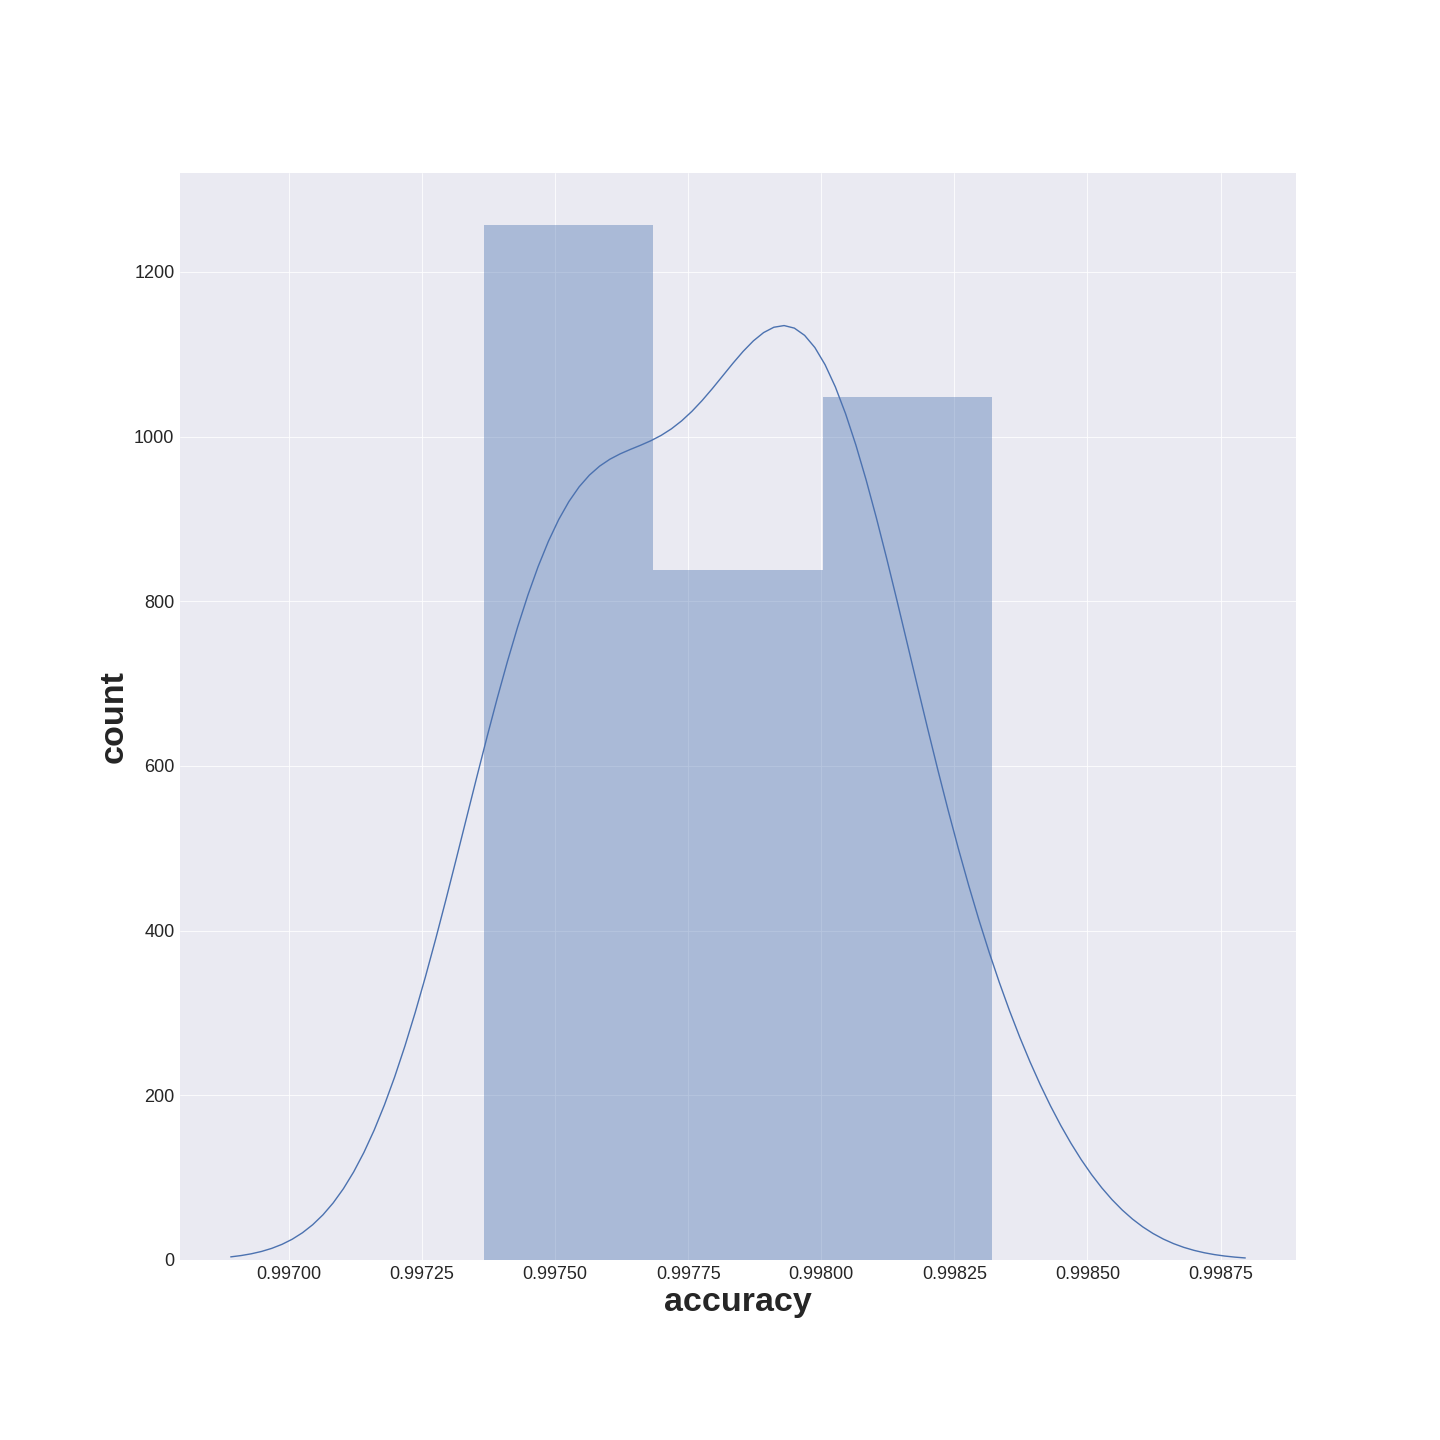

In [7]:
data = pd.DataFrame.from_csv("HH1333134985_pks1613-586.1822.ms_all_data_baseline2and6.csv")
if len(np.where(data["rfi"].values == 1)[0])/float(len(data["rfi"])) < 0.4:
    for name in names:
        data[name] = normalize(data[name],norm='l2')[0]
    HH_X0 = data
    del data
    for i in range(10):
        HH_X0 = shuffle(HH_X0)
    HH_X0_not = HH_X0[HH_X0["rfi"]==0]
    HH_X0_is = HH_X0[HH_X0["rfi"]==1]
    HH_X0 = pd.concat([HH_X0_not[:],HH_X0_is], ignore_index=True)
    del HH_X0_not
    del HH_X0_is

    ######### NB ###############
    model_accuracies = []
    for i in range(1000):
        (training_inputs,
         testing_inputs,
         training_classes,
         testing_classes) = train_test_split(HH_X0[names], HH_X0['rfi'], train_size=0.7)

        decision_tree_classifier = RandomForestClassifier(n_jobs=-1)
        decision_tree_classifier.fit(training_inputs, training_classes)
        classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
        model_accuracies.append(classifier_accuracy)

    sns.plt.figure(figsize=(20,20)) 
    sns.distplot(model_accuracies)
    sns.plt.xlabel("accuracy",fontsize = 34 ,fontweight='bold')
    sns.plt.ylabel("count",fontsize = 34 ,fontweight='bold')
    sns.plt.xticks(size=18)
    sns.plt.yticks(size=18)
    sns.plt.show()
    #sns.plt.savefig('Same_source_'+filename.split("_")[1].split('.')[0]+'_and_baseline_'+filename[:2]+'_'+filename.split('baseline')[-1].split('.')[0]+'_validation_NB.eps', format='eps', dpi=600)

    cv_scores = cross_val_score(decision_tree_classifier, HH_X0[names], HH_X0['rfi'], cv=15)
    sns.plt.figure(figsize=(20,20))
    sns.distplot(cv_scores)
    sns.plt.xlabel("accuracy",fontsize = 34 ,fontweight='bold')
    sns.plt.ylabel("count",fontsize = 34 ,fontweight='bold')
    sns.plt.xticks(size=18)
    sns.plt.yticks(size=18)
    sns.plt.show()
    #sns.plt.savefig('Same_source_'+filename.split("_")[1].split('.')[0]+'_and_baseline_'+filename[:2]+'_'+filename.split('baseline')[-1].split('.')[0]+'_cross_validation_NB.eps', format='eps', dpi=600)
